In [1]:
from mtcnn import MTCNN
import cv2
import numpy as np
from matplotlib import pyplot as plt

detector = MTCNN()

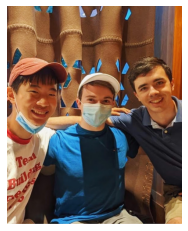

In [6]:
# load a sample image
img = cv2.cvtColor(cv2.imread("test_face_3.jpg"), cv2.COLOR_BGR2RGB)

plt.axis('off')
plt.imshow(img)

[{'box': [229, 249, 108, 130], 'confidence': 0.9999978542327881, 'keypoints': {'left_eye': (266, 295), 'right_eye': (314, 297), 'nose': (293, 327), 'mouth_left': (267, 346), 'mouth_right': (305, 348)}}, {'box': [403, 202, 111, 130], 'confidence': 0.9999582767486572, 'keypoints': {'left_eye': (432, 260), 'right_eye': (480, 244), 'nose': (462, 275), 'mouth_left': (448, 302), 'mouth_right': (493, 289)}}, {'box': [38, 212, 134, 161], 'confidence': 0.9998549222946167, 'keypoints': {'left_eye': (87, 266), 'right_eye': (147, 278), 'nose': (115, 310), 'mouth_left': (72, 324), 'mouth_right': (131, 336)}}]


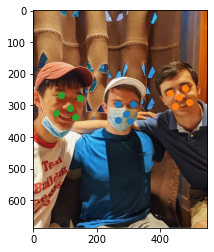

In [12]:
# get face detection output, print details, and display keypoints
out = detector.detect_faces(img)
print(out)

plt.imshow(img)
for face in out:
    pts = list(face['keypoints'].values())
    plt.scatter([pt[0] for pt in pts], [pt[1] for pt in pts])

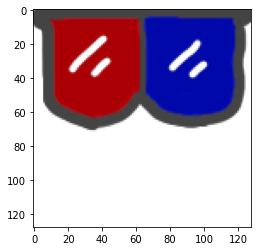

In [13]:
# load filter
en_filt = cv2.cvtColor(cv2.imread('en_glasses.png', cv2.IMREAD_UNCHANGED), cv2.COLOR_BGRA2RGBA)

plt.imshow(en_filt) # alignment points are (31, 31), (63, 95), (95, 31)

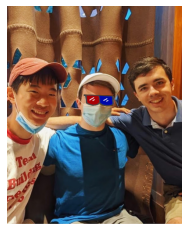

In [9]:
# fit filter to face
filt_pts = np.array([[31, 31], [63, 95], [95, 31]], dtype=np.float32)

plt.axis('off')
plt.imshow(img)

for face in out:
    pts = list(face['keypoints'].values())
    img_pts = np.ones((3,2), dtype=np.float32)
    img_pts[0, :] = pts[0] # left eye
    img_pts[1, :] = pts[2] # nose
    img_pts[2, :] = pts[1] # right eye

    M = cv2.getAffineTransform(filt_pts, img_pts)
    filtOut = cv2.warpAffine(en_filt, M, (img.shape[1], img.shape[0]))

    plt.imshow(filtOut)

